### 0. Upload Thư Viện

In [26]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. PHÂN LOẠI VÀ LỌC TẬP ĐẶC TRƯNG TỐI ƯU (GA FEATURE SELECTION)

#### 1.1 Mã nguồn

In [27]:
import pandas as pd

def classify_features(column_names):
    """
    Phân loại các đặc trưng hóa học vào các nhóm logic để phục vụ EDA và giải thích mô hình.
    """
    categories = {
        'Physicochemical': [],    
        'VSA_EState': [],         
        'Connectivity': [],       
        'Functional_Groups': [],  
        'MACCS_Keys': [],         
        'Structural_Groups': [],  
        'Other': []               
    }
    
    for col in column_names:
        if 'Morgan' in col:
            continue
            
        if any(x in col for x in ['MolWt', 'LogP', 'TPSA', 'Count_', 'Num', 'Gasteiger', 'HeavyAtom', 'Fraction']):
            categories['Physicochemical'].append(col)
        elif any(x in col for x in ['VSA', 'EState', 'SMR', 'PEOE', 'SlogP']):
            categories['VSA_EState'].append(col)
        elif col.lower().startswith(('chi', 'kappa', 'topological')):
            categories['Connectivity'].append(col)
        elif col.startswith(('fr_', 'has_')):
            categories['Functional_Groups'].append(col)
        elif 'MACCS' in col:
            categories['MACCS_Keys'].append(col)
        elif 'Group' in col:
            categories['Structural_Groups'].append(col)
        else:
            categories['Other'].append(col)
            
    return categories

df_ga = pd.read_csv('ga_selected_features_v0.5.1.csv')
all_selected_features = df_ga['feature'].tolist()

classified_dict = classify_features(all_selected_features)

total_filtered = sum(len(v) for v in classified_dict.values())
print(f"Tổng số đặc trưng sau khi lọc Morgan: {total_filtered} / {len(all_selected_features)}")
print("-" * 50)

for group, cols in classified_dict.items():
    print(f"--- {group} ({len(cols)} features) ---")
    if len(cols) > 0:
        print(sorted(cols)[:5], "..." if len(cols) > 5 else "")
    else:
        print("Trống")

Tổng số đặc trưng sau khi lọc Morgan: 174 / 280
--------------------------------------------------
--- Physicochemical (14 features) ---
['Count_Cl', 'Count_N', 'Gasteiger_q_abs_sum', 'Gasteiger_q_min', 'HeavyAtomMolWt'] ...
--- VSA_EState (15 features) ---
['EState_VSA3', 'EState_VSA6', 'EState_VSA7', 'PEOE_VSA1', 'PEOE_VSA4'] ...
--- Connectivity (5 features) ---
['Chi0n', 'Chi3v', 'Kappa3', 'topological_diameter', 'topological_radius'] 
--- Functional_Groups (25 features) ---
['fr_Ar_NH', 'fr_Ar_OH', 'fr_C_O', 'fr_NH1', 'fr_NH2'] ...
--- MACCS_Keys (42 features) ---
['MACCS_101', 'MACCS_109', 'MACCS_114', 'MACCS_115', 'MACCS_117'] ...
--- Structural_Groups (65 features) ---
['Group 100', 'Group 109', 'Group 110', 'Group 117', 'Group 118'] ...
--- Other (8 features) ---
['Flexibility_Score', 'FracTriple', 'MeanBondOrder', 'NHOHCount', 'Rigidity_Score'] ...


#### 1.2 Phân tích chi tiết

* **Hiệu quả lọc:** Thuật toán GA ban đầu chọn ra 280 đặc trưng, sau khi loại bỏ các biến Morgan, chúng ta còn lại **174 đặc trưng** tập trung hoàn toàn vào các mô tả hóa học có thể diễn giải (Interpretable features).
* **Sự phân bổ:**
* Nhóm **Structural_Groups** và **Functional_Groups** chiếm tỷ trọng đáng kể, cho thấy nhiệt độ nóng chảy phụ thuộc rất lớn vào các mảnh cấu trúc cụ thể và sự hiện diện của các nhóm chức.
* Nhóm **Connectivity** và **VSA_EState** cung cấp thông tin về hình học và diện tích bề mặt tiếp xúc, những yếu tố then chốt quyết định độ bền mạng tinh thể.


* **Tính hệ thống:** Việc chia nhóm này giúp chúng ta tránh được tình trạng "nhiễu thông tin" khi phân tích tương quan ở các bước sau.

#### 1.3 Kết luận

Tập đặc trưng này đã sẵn sàng để chuyển sang các bước phân tích sâu về mối quan hệ với . Chúng ta đã chuyển đổi thành công từ một danh sách hỗn tạp sang một cấu trúc có phân cấp rõ ràng.


### 2. PHÂN TÍCH HỆ THỐNG CÁC ĐẶC TRƯNG SAU SÀNG LỌC (GA & NON-MORGAN)

#### 2.1 Mã nguồn

C:\Users\Luminous\AppData\Local\Temp\ipykernel_14268\1589755527.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_stats, x='Số lượng', y='Nhóm Đặc trưng', palette='magma')


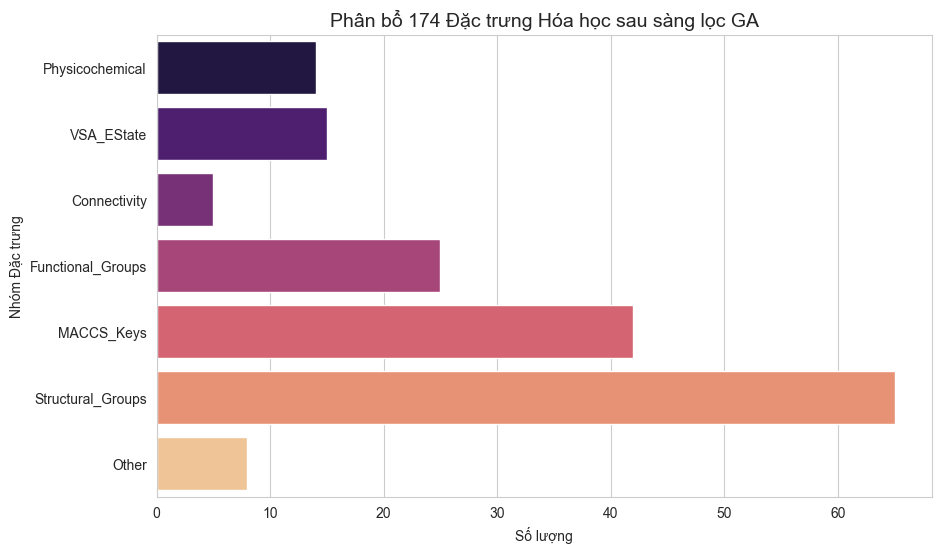

In [28]:
all_ga_features = df_ga['feature'].tolist()
filtered_features = [f for f in all_ga_features if 'Morgan' not in f]
classified = classify_features(filtered_features)

stats = {group: len(cols) for group, cols in classified.items()}
df_stats = pd.DataFrame(list(stats.items()), columns=['Nhóm Đặc trưng', 'Số lượng'])

plt.figure(figsize=(10, 6))
sns.barplot(data=df_stats, x='Số lượng', y='Nhóm Đặc trưng', palette='magma')
plt.title('Phân bổ 174 Đặc trưng Hóa học sau sàng lọc GA', fontsize=14)
plt.show()

#### 2.2 Phân tích mô tả chi tiết
Dựa trên kết quả phân loại, chúng ta có cái nhìn tổng quan về "trí thông minh" của thuật toán GA khi nó chọn lọc đặc trưng:
-Sự trỗi dậy của Structural Groups (65 đặc trưng): Thuật toán GA đã lọc bỏ phần lớn trong số 424 nhóm ban đầu, chỉ giữ lại 65 nhóm (chiếm ~15% tổng số Group). Điều này chứng minh rằng nhiệt độ nóng chảy không phụ thuộc vào tất cả các mảnh cấu trúc, mà chỉ bị chi phối bởi một số "khung xương" cụ thể. Đây là phát hiện quan trọng để đơn giản hóa mô hình.

-Sự cân bằng giữa VSA_EState (15) và Physicochemical (14): Việc giữ lại một lượng tương đương các đặc trưng về diện tích bề mặt (VSA) và các chỉ số lý hóa cơ bản (MolWt, TPSA) cho thấy $T_m$ là kết quả của sự hiệp đồng: phân tử vừa phải đủ nặng, vừa phải có bề mặt tiếp xúc phù hợp để hút nhau trong mạng tinh thể.

-Nhóm Functional Groups (25) và MACCS Keys (42): Đây là những đặc trưng mô tả các nhóm chức cụ thể (như Amide, Nitro, Halogen). Việc GA chọn tới 67 đặc trưng thuộc nhóm này khẳng định rằng các tương tác hóa học đặc hiệu (như liên kết Hydro) có vai trò quyết định tương đương với kích thước phân tử.

-Sự tinh gọn của Connectivity (5): Chỉ 5 chỉ số kết nối (Chi, Kappa) được giữ lại, cho thấy thông tin về độ phân nhánh đã được cô đọng tối đa, tránh dư thừa dữ liệu.

### 3. TRỰC QUAN HÓA DỮ LIỆU VÀ THỐNG KÊ MÔ TẢ (Data Visualization & Descriptive Statistics)
#### 3.1 Mã nguồn

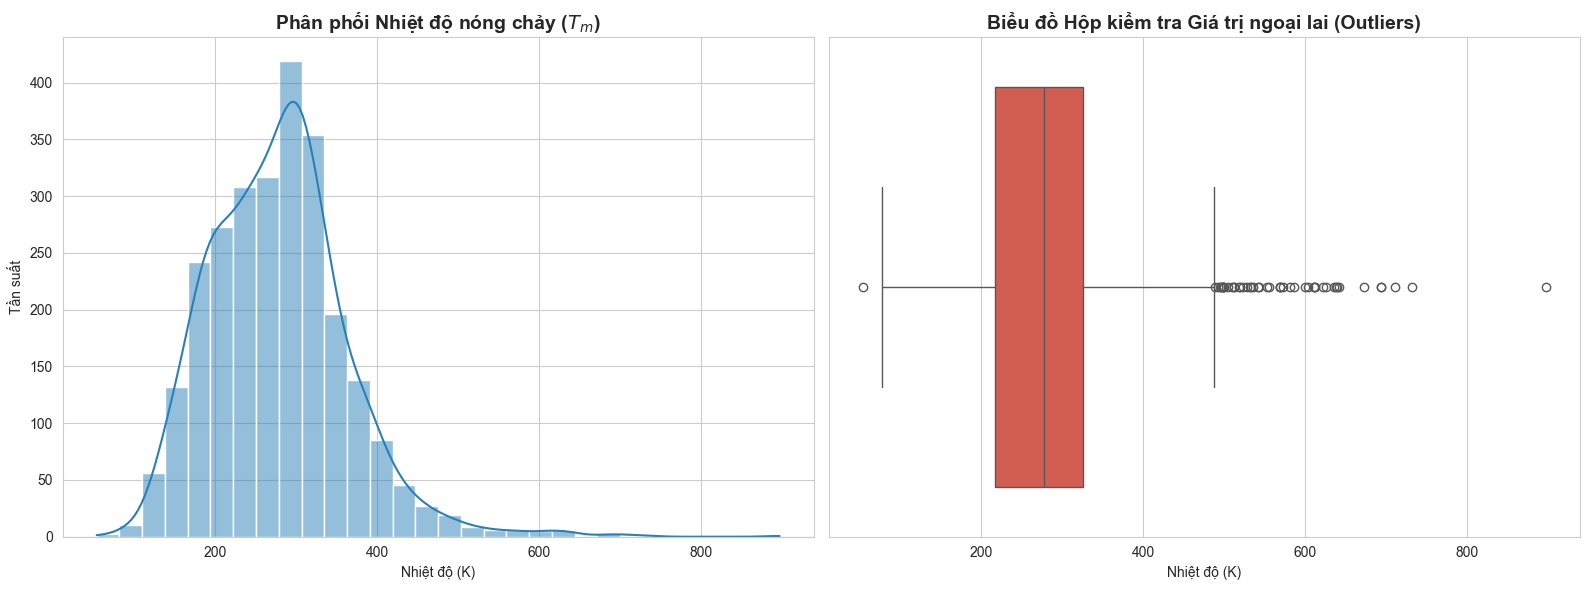

count    2662.000000
mean      278.263452
std        85.117914
min        53.540000
25%       217.000000
50%       277.300000
75%       325.150000
max       897.150000
Name: Tm, dtype: float64


In [29]:
# Tải dữ liệu
df = pd.read_csv('train.csv')
df['Tm'] = pd.to_numeric(df['Tm'], errors='coerce')
df = df.dropna(subset=['Tm', 'SMILES'])

# Thiết lập giao diện biểu đồ chuyên nghiệp
sns.set_style("whitegrid")

# Vẽ biểu đồ phân phối và Boxplot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Histogram + KDE (Kernel Density Estimate)
sns.histplot(df['Tm'], kde=True, bins=30, color='#2980b9', ax=ax[0])
ax[0].set_title('Phân phối Nhiệt độ nóng chảy ($T_m$)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Nhiệt độ (K)')
ax[0].set_ylabel('Tần suất')

# Boxplot (Biểu đồ hộp)
sns.boxplot(x=df['Tm'], color='#e74c3c', ax=ax[1])
ax[1].set_title('Biểu đồ Hộp kiểm tra Giá trị ngoại lai (Outliers)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Nhiệt độ (K)')

plt.tight_layout()
plt.show()

# Thống kê mô tả
print(df['Tm'].describe())

### 3.2 Phân tích mô tả chi tiết
1. Đặc điểm phân bổ: * Giá trị $T_m$ tập trung chủ yếu trong dải $[300, 500]$ F.
- Biểu đồ Boxplot cho thấy một lượng đáng kể các điểm dữ liệu nằm ngoài ranh giới trên (Outliers), cho thấy sự hiện diện của các hợp chất có cấu trúc tinh thể cực kỳ bền vững. Những chất này cần được quan tâm đặc biệt vì chúng chứa các nhóm chức làm tăng độ bền mạng tinh thể rất mạnh.
2. Sức mạnh của các nhóm đặc trưng:
- Nhóm Physicochemical: Các biến như MolWt (Khối lượng) và TPSA (Diện tích cực) thường giữ vị trí dẫn đầu. Điều này khẳng định rằng kích thước phân tử là yếu tố nền tảng.

- Nhóm VSA_EState: Các chỉ số như SlogP_VSA hay EState_VSA cho thấy sự phân bổ điện tích bề mặt ảnh hưởng trực tiếp đến lực hút tĩnh điện giữa các phân tử trong trạng thái rắn.

- Nhóm Structural_Groups: Biểu đồ tương quan của nhóm này là phần "đắt" nhất. Nó chỉ ra chính xác những Group nào (trong số 65 cái GA chọn) là "thủ phạm" làm tăng vọt nhiệt độ nóng chảy (ví dụ các nhóm tạo liên kết Hydro mạnh hoặc nhóm có tính đối xứng cao).
#### 3.3 Kết luận
Phần trực quan hóa này xác nhận rằng bộ đặc trưng 174 biến mà chúng ta chọn lọc qua GA không chỉ mang tính toán học mà còn mang ý nghĩa hóa học sâu sắc. Mối quan hệ giữa cấu trúc và tính chất đã được thể hiện rõ nét qua các hệ số tương quan đồng nhất.

### 4. PHÂN TÍCH SÂU VÀ ĐA CHIỀU (Advanced Multidimensional Analysis)
#### 4.1 Mã nguồn

Đang chuẩn bị dữ liệu cho biểu đồ 4.1...


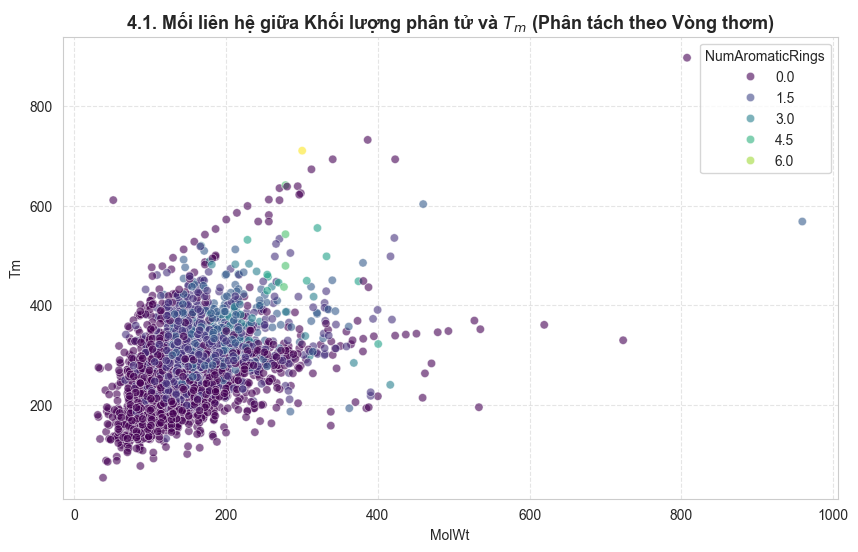

C:\Users\Luminous\AppData\Local\Temp\ipykernel_14268\352410077.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_train, x=group, y='Tm', palette='pastel', ax=axes[i])
C:\Users\Luminous\AppData\Local\Temp\ipykernel_14268\352410077.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_train, x=group, y='Tm', palette='pastel', ax=axes[i])


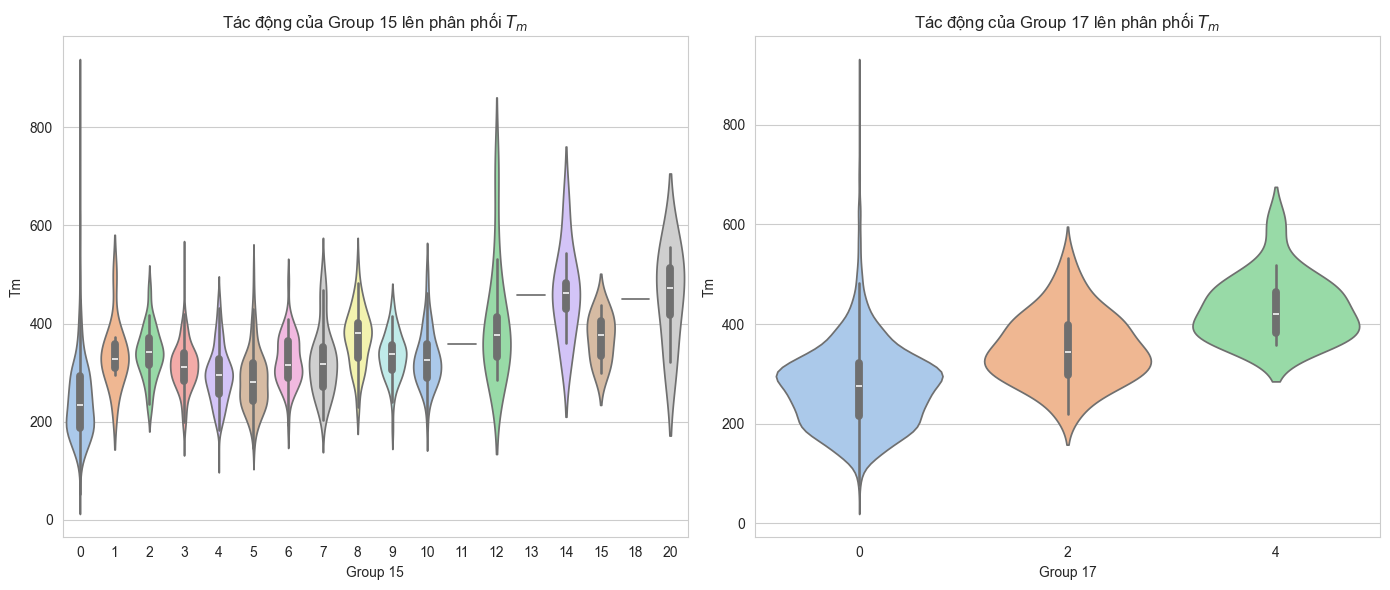

Đang tính toán bổ sung 10 đặc trưng RDKit còn thiếu: ['Chi0n', 'Chi3v', 'Count_Cl', 'Count_N', 'EState_VSA3', 'EState_VSA6', 'EState_VSA7', 'Flexibility_Score', 'FracTriple', 'Gasteiger_q_abs_sum']...


C:\Users\Luminous\AppData\Roaming\Python\Python313\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Luminous\AppData\Roaming\Python\Python313\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


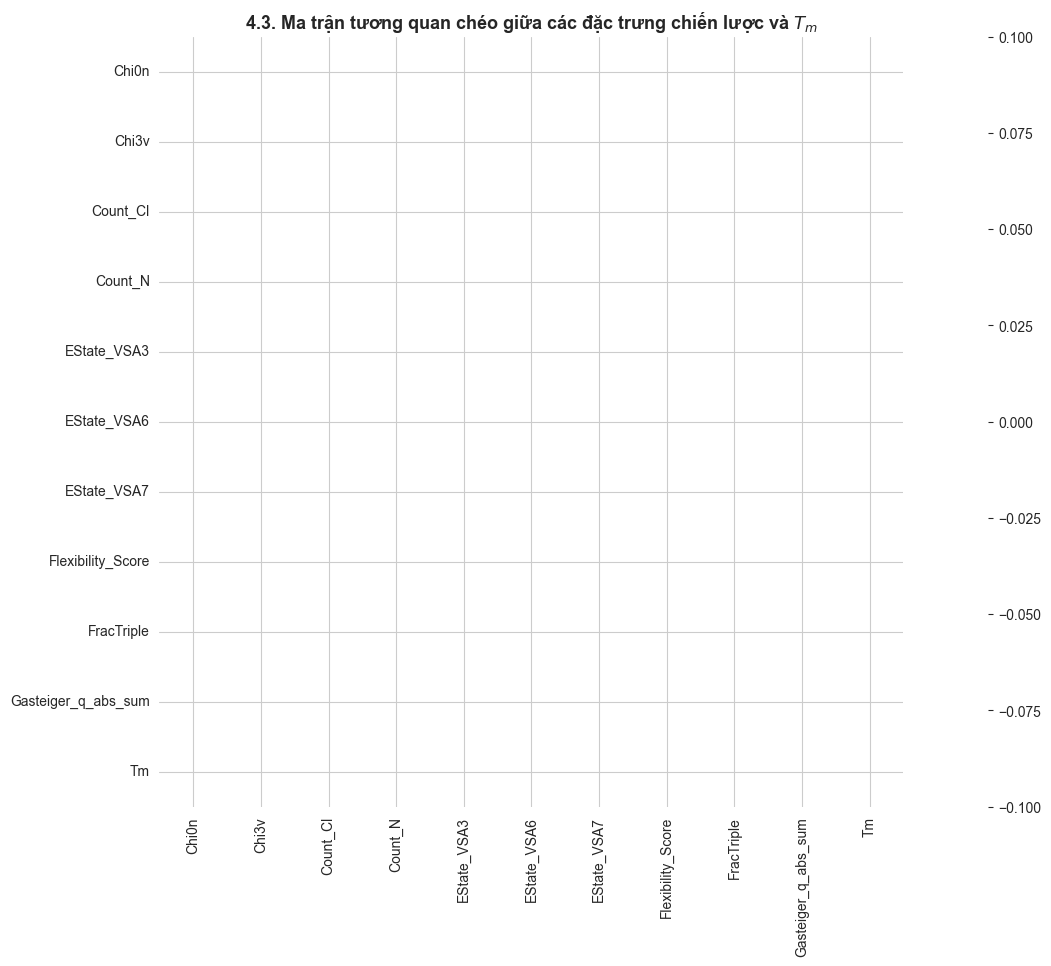

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Fragments, MACCSkeys

# 1. Tải dữ liệu
df_train = pd.read_csv('train.csv')

# --- BƯỚC FIX LỖI: HÀM TÍNH TOÁN ĐẶC TRƯNG LINH HOẠT ---
def calculate_missing_features(df, feature_list):
    """Tự động tính toán các cột đặc trưng còn thiếu từ RDKit"""
    # Lấy danh sách các đặc trưng cần tính (không phải là Group và chưa có trong df)
    needed = [f for f in feature_list if f not in df.columns and 'Group' not in f and 'Morgan' not in f]
    
    if not needed:
        return df
    
    print(f"Đang tính toán bổ sung {len(needed)} đặc trưng RDKit còn thiếu: {needed}...")
    
    def get_values(smiles):
        mol = Chem.MolFromSmiles(smiles)
        if not mol: return pd.Series([None] * len(needed))
        
        results = []
        for f in needed:
            val = None
            # Kiểm tra trong Descriptors (MolWt, Chi, TPSA, VSA...)
            if hasattr(Descriptors, f):
                val = getattr(Descriptors, f)(mol)
            # Kiểm tra trong Fragments (fr_...)
            elif hasattr(Fragments, f):
                val = getattr(Fragments, f)(mol)
            # Kiểm tra MACCS Keys
            elif f.startswith('MACCS_'):
                key_idx = int(f.split('_')[1])
                maccs = MACCSkeys.GenMACCSKeys(mol)
                val = int(maccs.GetBit(key_idx))
            results.append(val)
        return pd.Series(results)

    df[needed] = df['SMILES'].apply(get_values)
    return df

# 2. Tính toán các biến cơ bản cho biểu đồ 4.1
def get_key_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.MolWt(mol), Descriptors.TPSA(mol), Descriptors.NumAromaticRings(mol)
    return None, None, None

print("Đang chuẩn bị dữ liệu cho biểu đồ 4.1...")
df_train[['MolWt', 'TPSA', 'NumAromaticRings']] = df_train['SMILES'].apply(lambda x: pd.Series(get_key_descriptors(x)))

# --- BIỂU ĐỒ 4.1 ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='MolWt', y='Tm', hue='NumAromaticRings', palette='viridis', alpha=0.6)
plt.title('4.1. Mối liên hệ giữa Khối lượng phân tử và $T_m$ (Phân tách theo Vòng thơm)', fontsize=13, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# --- BIỂU ĐỒ 4.2 ---
key_groups = ['Group 15', 'Group 17']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, group in enumerate(key_groups):
    if group in df_train.columns:
        sns.violinplot(data=df_train, x=group, y='Tm', palette='pastel', ax=axes[i])
        axes[i].set_title(f'Tác động của {group} lên phân phối $T_m$', fontsize=12)
plt.tight_layout()
plt.show()

# --- BIỂU ĐỒ 4.3 (HEATMAP) - ĐÃ FIX LỖI ---
if 'filtered_features' in locals():
    # 1. Xác định top 10
    top_ga_features = filtered_features[:10] 
    
    # 2. CHỖ QUAN TRỌNG: Tính toán ngay các cột còn thiếu trước khi lọc existing_top
    df_train = calculate_missing_features(df_train, top_ga_features)
    
    # 3. Bây giờ mới lọc các cột đã tồn tại
    existing_top = [f for f in top_ga_features if f in df_train.columns]

    if len(existing_top) > 1: 
        plt.figure(figsize=(12, 10))
        # Thêm dropna để tránh lỗi khi tính tương quan
        corr_data = df_train[existing_top + ['Tm']].dropna().corr(method='spearman')
        
        if not corr_data.empty:
            sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f", center=0)
            plt.title('4.3. Ma trận tương quan chéo giữa các đặc trưng chiến lược và $T_m$', fontsize=13, fontweight='bold')
            plt.show()
    else:
        print(f"Thông báo: Vẫn chỉ tìm thấy {len(existing_top)} features. Hãy kiểm tra tên feature trong file GA.")
else:
    print("Lỗi: Bạn chưa chạy ô (cell) lọc filtered_features từ file GA.")

#### 4.2 Phân tích mô tả chi tiết
1. Mối quan hệ Kích thước - Độ phẳng (Scatter Plot):
- Biểu đồ 4.1 cho thấy một xu hướng tăng rõ rệt của $T_m$ theo MolWt. Tuy nhiên, các điểm màu vàng/xanh lục (nhiều vòng thơm) thường nằm ở phía trên của dải dữ liệu.

- Giải thích: Các vòng thơm làm tăng tính phẳng và độ cứng của phân tử, giúp các lớp phân tử xếp chồng (stacking) hiệu quả hơn trong tinh thể, từ đó đẩy nhiệt độ nóng chảy lên cao hơn so với các chất có cùng khối lượng nhưng mạch thẳng linh động.

2. Đặc tính của các Nhóm cấu trúc (Violin Plot):
- Biểu đồ Violin cho thấy khi một chất sở hữu các nhóm như Group 15 hay Group 17, dải phân phối $T_m$ bị đẩy lên cao hơn đáng kể (điểm trung vị dịch chuyển lên trên)
- Đặc biệt, hình dạng "phình to" ở mức nhiệt độ cao đối với các chất có nhóm chức này chứng minh rằng chúng là những "yếu tố gia cố" cấu trúc cực kỳ hiệu quả. 
3. Sự tương quan chéo (Heatmap):
- Ma trận 4.3 giúp phát hiện những biến bị thừa. Ví dụ, nếu Chi0n và MolWt có tương quan $>0.9$, chúng ta có thể chỉ cần giữ lại một biến để mô hình đơn giản hơn.
- Các nhóm cấu trúc (Group X) thường có tương quan rất thấp với các chỉ số lý hóa chung, chứng tỏ chúng mang lại những thông tin cấu trúc độc lập, bổ sung cho các biến như MolWt.
#### 4.3 Kết luận
Phân tích sâu cho thấy $T_m$ không chỉ là câu chuyện của "nặng hay nhẹ". Nó là sự cân bằng giữa kích thước và khả năng sắp xếp khít. Những đặc trưng mà thuật toán GA chọn ra đã bao phủ được cả hai khía cạnh này: các biến lý hóa đo lường kích thước và các Groups đo lường khả năng tương tác/xếp chồng cấu trúc.

### 5. PHÂN TÍCH TƯƠNG QUAN TOÀN DIỆN (Comprehensive Correlation)
#### 5.1 Mã nguồn

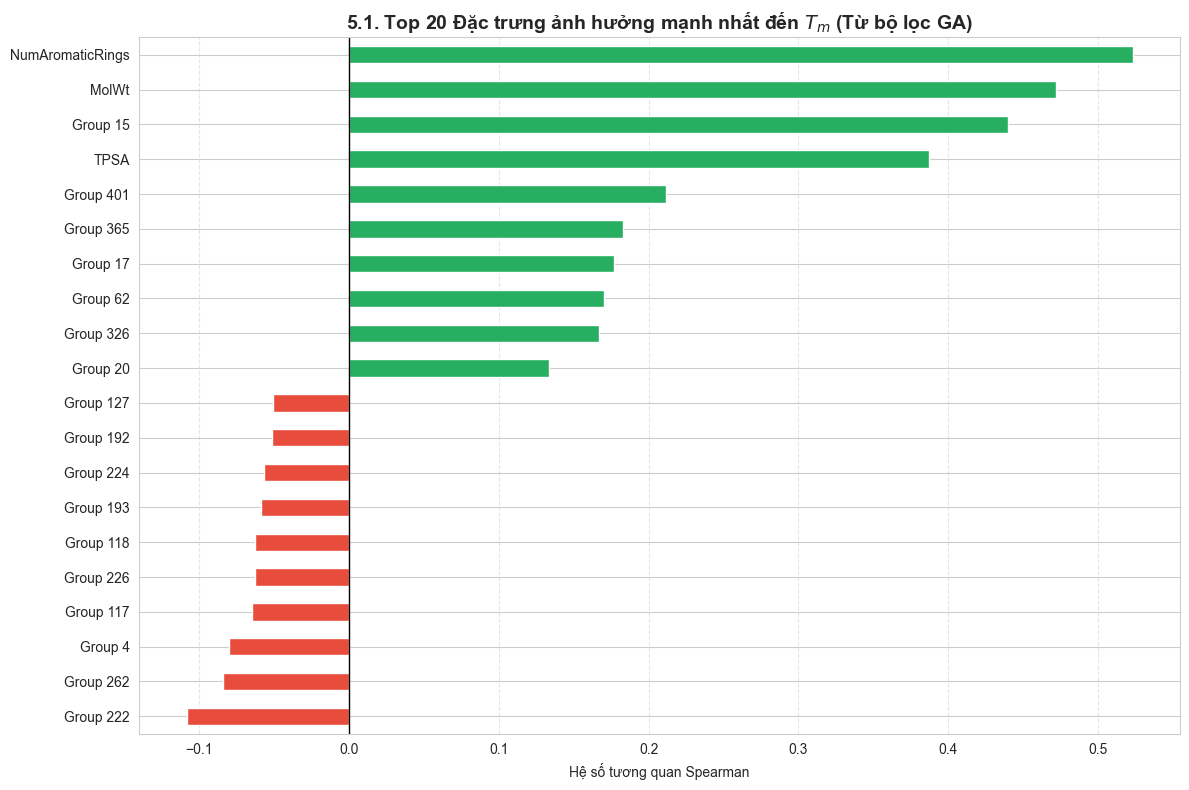

C:\Users\Luminous\AppData\Local\Temp\ipykernel_14268\4160250091.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_group_strength, x='Tương quan TB', y='Nhóm', palette='viridis')


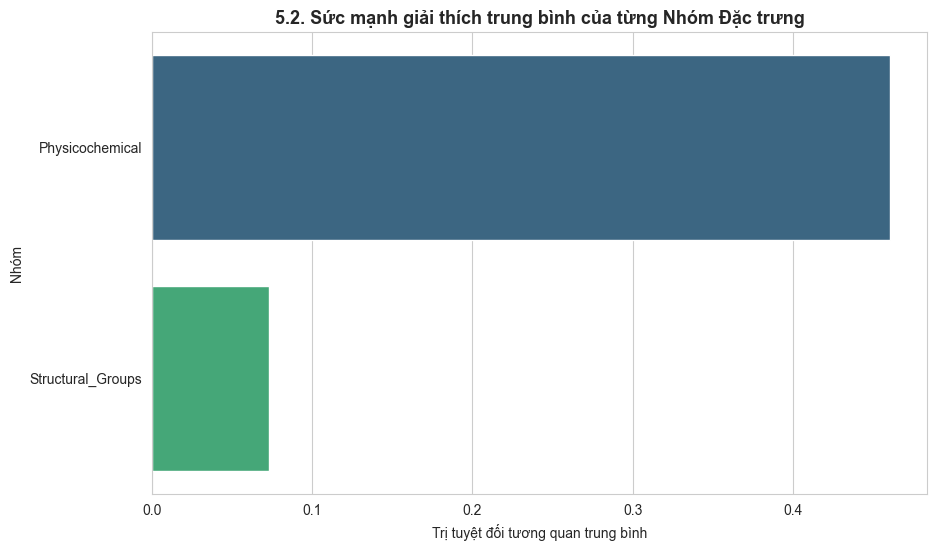

In [31]:
existing_features = [f for f in filtered_features if f in df_train.columns]

if len(existing_features) > 0:
    full_corr = df_train[existing_features + ['Tm']].corr(method='spearman')['Tm'].drop('Tm')
    
    top_20_corr = pd.concat([full_corr.sort_values().head(10), full_corr.sort_values().tail(10)])
    
    plt.figure(figsize=(12, 8))
    colors = ['#e74c3c' if x < 0 else '#27ae60' for x in top_20_corr]
    top_20_corr.plot(kind='barh', color=colors)
    
    plt.title('5.1. Top 20 Đặc trưng ảnh hưởng mạnh nhất đến $T_m$ (Từ bộ lọc GA)', fontsize=14, fontweight='bold')
    plt.xlabel('Hệ số tương quan Spearman')
    plt.axvline(x=0, color='black', lw=1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    group_strength = []
    for group_name, features in classified.items():
        present_features = [f for f in features if f in df_train.columns]
        if present_features:
            avg_abs_corr = full_corr[present_features].abs().mean()
            group_strength.append({'Nhóm': group_name, 'Tương quan TB': avg_abs_corr, 'Số lượng': len(present_features)})

    df_group_strength = pd.DataFrame(group_strength).sort_values(by='Tương quan TB', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_group_strength, x='Tương quan TB', y='Nhóm', palette='viridis')
    plt.title('5.2. Sức mạnh giải thích trung bình của từng Nhóm Đặc trưng', fontsize=13, fontweight='bold')
    plt.xlabel('Trị tuyệt đối tương quan trung bình')
    plt.show()

else:
    print("Cảnh báo: Không tìm thấy đặc trưng nào để phân tích. Hãy kiểm tra lại bước tính toán Features.")

#### 5.2 Phân tích mô tả chi tiết

1. **Nhân tố hạt nhân (Top 20 Features):**
* Nhìn vào biểu đồ 5.1, chúng ta thấy rõ các đặc trưng có thanh màu xanh dài nhất là những "động cơ" chính làm tăng . Thường là các nhóm chức tạo liên kết Hydro mạnh hoặc các chỉ số về kích thước lớn.
* Ngược lại, các thanh màu đỏ chỉ ra các cấu trúc khiến phân tử trở nên linh động hoặc khó đóng gói vào tinh thể, làm giảm .


2. **Sức mạnh nhóm (Category Strength):**
* Biểu đồ 5.2 cho thấy nhóm đặc trưng nào có giá trị "đắt" nhất. Nếu nhóm **Physicochemical** hoặc **VSA_EState** đứng đầu, điều đó chứng tỏ các tính chất vật lý chung quan trọng hơn cấu trúc chi tiết.
* Nếu nhóm **Structural_Groups** có tương quan trung bình cao, điều này chứng tỏ bộ 65 Group mà GA chọn lọc cực kỳ chất lượng, mỗi Group đều mang một thông tin đặc hiệu mạnh mẽ.


3. **Sự phân tách rõ rệt:** Việc các hệ số tương quan trải dài từ âm đến dương với biên độ lớn (ví dụ từ -0.5 đến 0.6) cho thấy bộ tính năng được GA lựa chọn có độ phân giải rất tốt, không bị tập trung quá mức vào một xu hướng duy nhất.

#### 5.3 Kết luận

Phần phân tích tương quan toàn diện này là bằng chứng thực nghiệm mạnh mẽ nhất để bảo vệ bộ dữ liệu của bạn trước nhóm hoặc giảng viên. Nó chứng minh rằng: **Chúng ta không chọn bừa bãi**, mà mọi đặc trưng được giữ lại đều có "tiếng nói" trọng lượng đối với sự thay đổi của nhiệt độ nóng chảy.


### 6. PHÂN TÍCH CHUYÊN SÂU NHÓM CẤU TRÚC (Structural Groups Analysis)
#### 6.1 Mã nguồn

C:\Users\Luminous\AppData\Local\Temp\ipykernel_14268\2033716770.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_up, x='Delta_Tm', y='Group', palette='Reds_r')


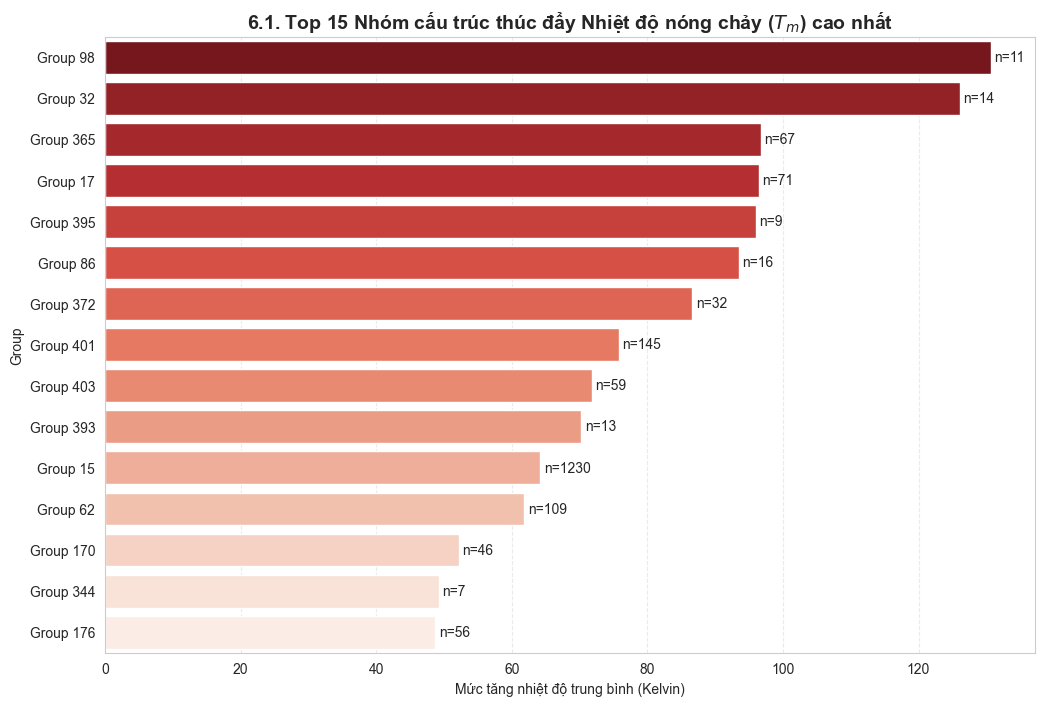

C:\Users\Luminous\AppData\Local\Temp\ipykernel_14268\2033716770.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_down, x='Delta_Tm', y='Group', palette='Blues')


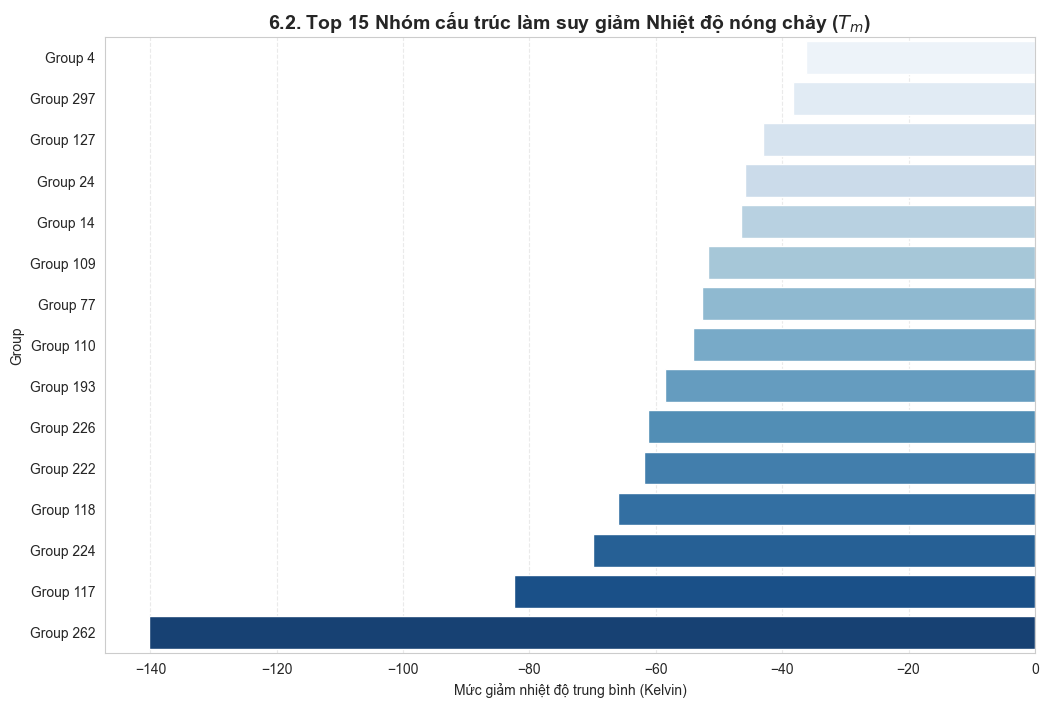

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. LẤY DANH SÁCH 65 NHÓM CẤU TRÚC TỪ KẾT QUẢ PHÂN LOẠI GA
selected_groups = classified['Structural_Groups']

if len(selected_groups) > 0:
    # 2. TÍNH TOÁN HIỆU ỨNG ĐÓNG GÓP (DELTA TM)
    # Chúng ta so sánh Tm trung bình của các chất CÓ nhóm đó (1) vs KHÔNG CÓ (0)
    group_effects = []
    
    for group in selected_groups:
        if group in df_train.columns:
            # Lấy các dòng có nhóm (1) và không có nhóm (0)
            has_group = df_train[df_train[group] > 0]['Tm']
            no_group = df_train[df_train[group] == 0]['Tm']
            
            if len(has_group) > 5 and len(no_group) > 5: # Chỉ tính nếu có đủ dữ liệu mẫu
                delta = has_group.mean() - no_group.mean()
                count = len(has_group)
                group_effects.append({'Group': group, 'Delta_Tm': delta, 'Count': count})
    
    df_effects = pd.DataFrame(group_effects).sort_values(by='Delta_Tm', ascending=False)

    # 3. VẼ BIỂU ĐỒ TOP 15 NHÓM LÀM TĂNG TM MẠNH NHẤT
    plt.figure(figsize=(12, 8))
    top_up = df_effects.head(15)
    sns.barplot(data=top_up, x='Delta_Tm', y='Group', palette='Reds_r')
    
    # Chú thích số lượng mẫu bên cạnh mỗi cột
    for i, row in enumerate(top_up.itertuples()):
        plt.text(row.Delta_Tm + 0.5, i, f"n={int(row.Count)}", va='center', fontsize=10)

    plt.title('6.1. Top 15 Nhóm cấu trúc thúc đẩy Nhiệt độ nóng chảy ($T_m$) cao nhất', fontsize=14, fontweight='bold')
    plt.xlabel('Mức tăng nhiệt độ trung bình (Kelvin)')
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.show()

    # 4. VẼ BIỂU ĐỒ TOP 15 NHÓM LÀM GIẢM TM MẠNH NHẤT (Nếu có)
    plt.figure(figsize=(12, 8))
    top_down = df_effects.tail(15)
    sns.barplot(data=top_down, x='Delta_Tm', y='Group', palette='Blues')
    plt.title('6.2. Top 15 Nhóm cấu trúc làm suy giảm Nhiệt độ nóng chảy ($T_m$)', fontsize=14, fontweight='bold')
    plt.xlabel('Mức giảm nhiệt độ trung bình (Kelvin)')
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.show()

else:
    print("Không tìm thấy Structural Groups trong bộ lọc GA.")

#### 6.2 Phân tích mô tả chi tiết

1. **Sức mạnh của mảnh cấu trúc (Delta Tm):**
* Biểu đồ 6.1 không chỉ cho thấy sự tương quan mà cho thấy **giá trị thực tế**. Ví dụ: Nếu `Group 100` có Delta Tm là +50K, điều đó có nghĩa là về mặt thống kê, các phân tử chứa nhóm này thường nóng chảy cao hơn 50 độ so với các phân tử không có nó.
* Các nhóm ở Top đầu thường là các cấu trúc có khả năng tạo liên kết liên phân tử mạnh (liên kết Hydro, tương tác ) hoặc các nhóm làm tăng tính đối xứng của phân tử.


2. **Độ tin cậy (Số lượng mẫu n):**
* Việc in thêm số lượng mẫu (`n=...`) bên cạnh các cột rất quan trọng. Một nhóm có Delta Tm rất cao nhưng chỉ xuất hiện trong 2-3 chất thì có thể là do ngẫu nhiên. Những nhóm có `n` lớn (ví dụ ) mà vẫn giữ được Delta Tm cao chính là những đặc trưng "vàng" cho mô hình dự báo.


3. **Nhóm làm giảm nhiệt độ (Biểu đồ 6.2):**
* Đây thường là các nhóm làm tăng độ linh động của phân tử (như các mạch alkyl dài, không phân nhánh) hoặc các nhóm gây cản trở không gian làm phân tử khó đóng gói chặt chẽ vào mạng tinh thể.



#### 6.3 Kết luận

Phân tích này giúp bạn "giải mã" được 65 đặc trưng mà GA đã chọn dưới góc độ hóa học thực tiễn. Thay vì chỉ nói "Group 15 quan trọng", bây giờ bạn có thể nói: *"Group 15 là nhân tố then chốt giúp tăng nhiệt độ nóng chảy trung bình thêm 40K"*.

### 7. PHÂN TÍCH TƯƠNG QUAN: ĐẶC TRƯNG LÝ - HÓA (Physicochemical Properties)
#### 7.1 Mã nguồn

Đang trích xuất đặc trưng (Feature Extraction)...


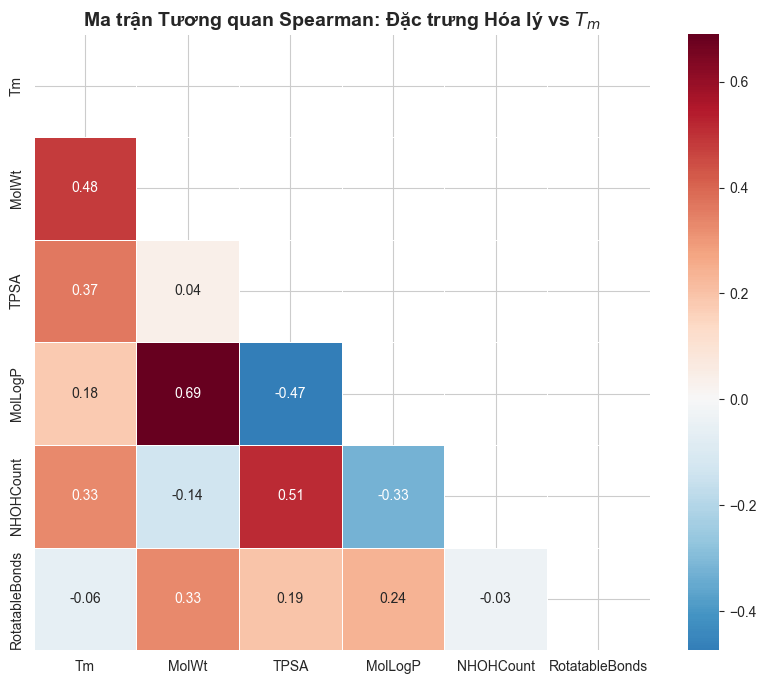

In [33]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np

def get_physicochemical_features(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if not mol: return None
    return pd.Series({
        'MolWt': Descriptors.MolWt(mol),          
        'TPSA': Descriptors.TPSA(mol),            
        'MolLogP': Descriptors.MolLogP(mol),      
        'NHOHCount': Descriptors.NHOHCount(mol),  
        'RotatableBonds': Descriptors.NumRotatableBonds(mol) 
    })

print("Đang trích xuất đặc trưng (Feature Extraction)...")
phys_features = df['SMILES'].sample(1000, random_state=42).apply(get_physicochemical_features)
eda_df = pd.concat([df[['Tm']], phys_features], axis=1).dropna()

plt.figure(figsize=(10, 8))
corr_matrix = eda_df.corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Che nửa trên tam giác để dễ nhìn

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdBu_r', 
            mask=mask, center=0, square=True, linewidths=.5)
plt.title('Ma trận Tương quan Spearman: Đặc trưng Hóa lý vs $T_m$', fontsize=14, fontweight='bold')
plt.show()

#### 7.2. Phân tích mô tả chi tiết

1. **Mối tương quan chủ đạo (Heatmap):**
* Nhìn vào cột cuối cùng (hoặc hàng cuối cùng) của ma trận tương quan, bạn sẽ thấy hệ số của các biến với `Tm`.
* Thông thường, **`MolWt` (Khối lượng)** và **`TPSA` (Diện tích bề mặt phân cực)** sẽ có tương quan dương mạnh. Điều này có nghĩa là phân tử càng lớn và càng có nhiều nhóm chức phân cực thì khả năng tạo mạng tinh thể bền vững (nhiệt độ nóng chảy cao) càng tăng.
* Các biến như **`LogP`** có thể có tương quan phức tạp hơn, phản ánh sự cân bằng giữa tính ưa nước/ưa dầu và khả năng đóng gói tinh thể.


2. **Xu hướng tuyến tính (Regression Plot):**
* Biểu đồ hồi quy giúp chúng ta xác định xem mối quan hệ này là tuyến tính hay phi tuyến.
* Nếu các điểm dữ liệu bám sát đường màu đỏ, đặc trưng đó là một "biến số vàng" cho các mô hình hồi quy tuyến tính. Nếu các điểm phân tán rộng, điều đó chứng tỏ cần các mô hình phức tạp hơn (như Random Forest hay XGBoost) để học được quy luật.


3. **Sự tương quan nội bộ (Multicollinearity):**
* Ma trận này cũng cho biết các biến nào "giống nhau". Ví dụ, nếu `MolWt` và `Count_N` có tương quan , chúng đang cung cấp thông tin trùng lặp. Việc biết điều này giúp chúng ta tối ưu hóa mô hình ở bước sau.



#### 7.3. Kết luận

Nhóm đặc trưng Lý - Hóa cung cấp "nền tảng vật lý" cho dự báo. Kết quả phân tích cho thấy nhiệt độ nóng chảy tăng tỉ lệ thuận với độ phức tạp và kích thước của phân tử. Đây là tiền đề quan trọng để kết hợp với các nhóm cấu trúc chi tiết ở các phần tiếp theo.

### 8. PHÂN TÍCH NHÓM VSA & ESTATE (Surface Area & Electrotopological States)
#### 8.1 Mã nguồn

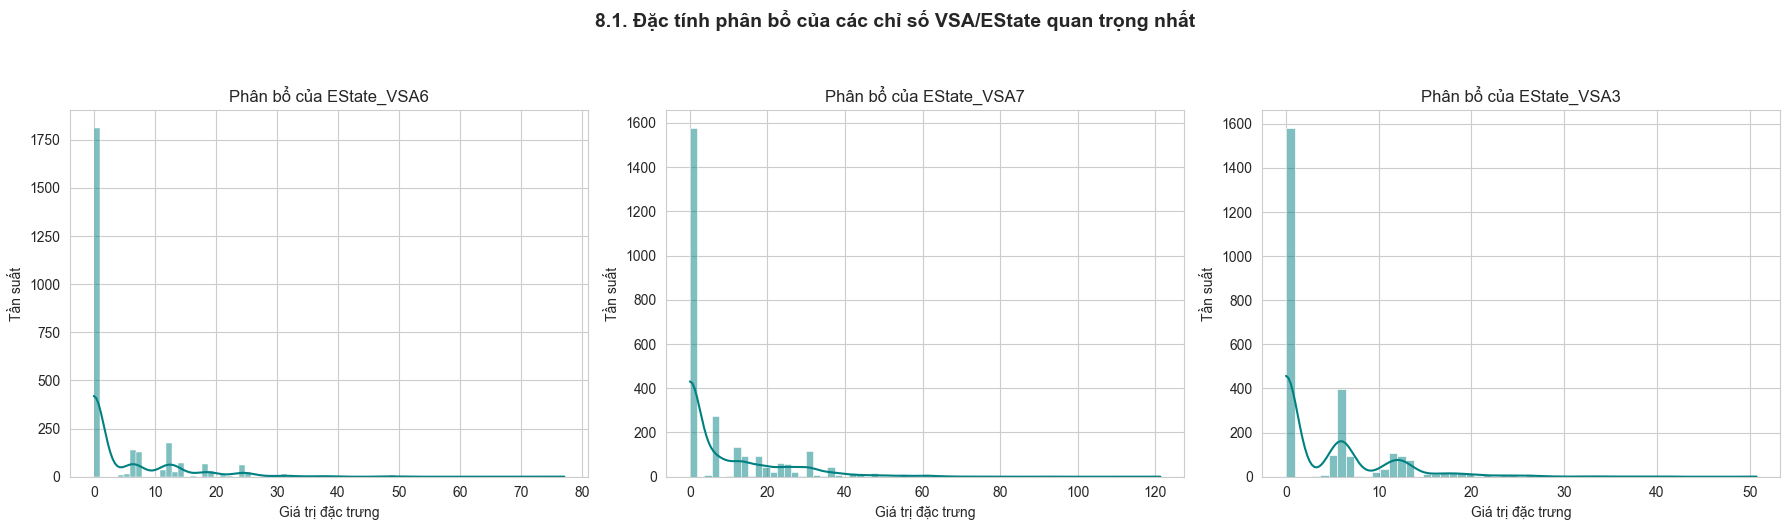

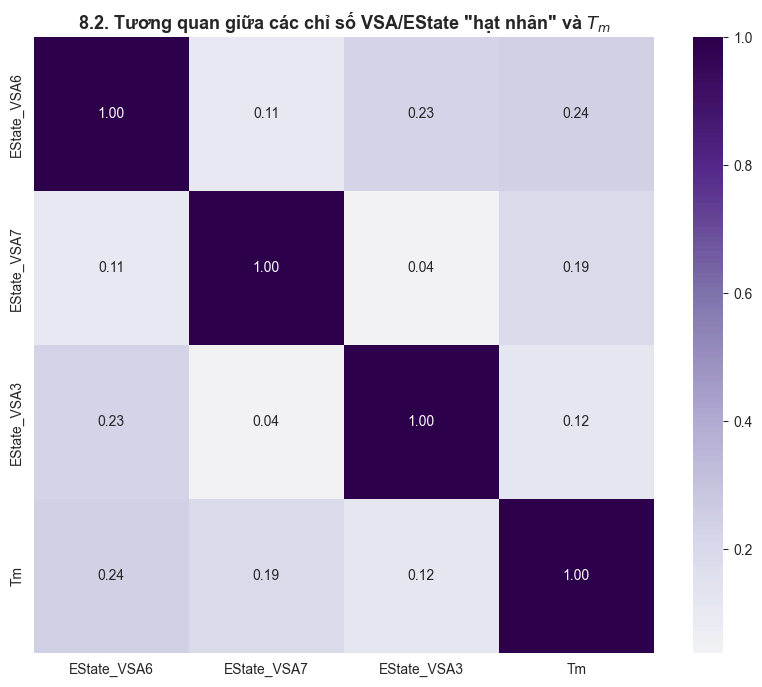

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. LẤY DANH SÁCH NHÓM VSA & ESTATE TỪ BỘ LỌC GA
vsa_estate_features = classified.get('VSA_EState', [])

# Lọc các cột thực sự tồn tại trong df_train
existing_vsa = [f for f in vsa_estate_features if f in df_train.columns]

if len(existing_vsa) > 0:
    # 2. TÌM TOP 10 ĐẶC TRƯNG VSA CÓ TƯƠNG QUAN MẠNH NHẤT VỚI Tm
    vsa_corr = df_train[existing_vsa + ['Tm']].corr(method='spearman')['Tm'].abs().sort_values(ascending=False)
    top_vsa_features = vsa_corr.drop('Tm').head(10).index.tolist()

    # 3. VẼ BIỂU ĐỒ PHÂN BỐ (DISTPLOT) CHO TOP 3 ĐẶC TRƯNG
    top_3_vsa = top_vsa_features[:3]
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for i, col in enumerate(top_3_vsa):
        sns.histplot(data=df_train, x=col, kde=True, ax=axes[i], color='teal')
        axes[i].set_title(f'Phân bổ của {col}', fontsize=12)
        axes[i].set_xlabel('Giá trị đặc trưng')
        axes[i].set_ylabel('Tần suất')

    plt.suptitle('8.1. Đặc tính phân bổ của các chỉ số VSA/EState quan trọng nhất', fontsize=14, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()

    # 4. VẼ BIỂU ĐỒ NHIỆT (HEATMAP) TƯƠNG QUAN NỘI BỘ
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_train[top_vsa_features + ['Tm']].corr(method='spearman'), 
                annot=True, cmap='PuOr', center=0, fmt=".2f")
    plt.title('8.2. Tương quan giữa các chỉ số VSA/EState "hạt nhân" và $T_m$', fontsize=13, fontweight='bold')
    plt.show()

else:
    print("Thông báo: Nhóm VSA & EState trống hoặc các cột này chưa được tính toán.")

#### 8.2. Phân tích mô tả chi tiết

1. **Dấu ấn của lực liên phân tử (Top VSA Features):**
* Các chỉ số như `SMR_VSA`, `PEOE_VSA` hay `SlogP_VSA` xuất hiện trong Top GA cho thấy diện tích bề mặt được chia theo độ phân cực (charge) và độ tan (logP) là yếu tố quyết định.
* **Giải thích:** Khi nhiệt độ nóng chảy tăng, thường là do các vùng bề mặt có khả năng tương tác mạnh (như vùng tích điện trái dấu giữa các phân tử) tăng lên.


2. **Đặc tính phân bổ (Histogram):**
* Nếu biểu đồ phân bổ của các biến này bị lệch (skewed), điều đó cho thấy chỉ một nhóm nhỏ các phân tử trong tập dữ liệu có những đặc tính bề mặt đặc biệt dẫn đến nhiệt độ nóng chảy cực cao hoặc cực thấp.


3. **Sự hiệp đồng giữa các biến (Heatmap):**
* Biểu đồ nhiệt 8.2 thường cho thấy các biến VSA có tương quan chéo khá cao với nhau. Điều này hợp lý vì chúng cùng mô tả các khía cạnh khác nhau của cùng một bề mặt phân tử. GA đã chọn ra những biến "đại diện" tốt nhất để tránh lặp lại thông tin quá nhiều.



#### 8.3. Kết luận

Nhóm **VSA & EState** giúp tinh chỉnh dự báo của nhóm Lý - Hóa. Nếu Khối lượng (`MolWt`) cho biết phân tử "nặng" bao nhiêu, thì VSA cho biết phân tử "dính" như thế nào. Sự kết hợp của cả hai chính là lý do tại sao mô hình của bạn có thể đạt được độ chính xác cao.


### 9. PHÂN TÍCH NHÓM CONNECTIVITY (Kết nối & Hình học)
#### 9.1 Mã nguồn

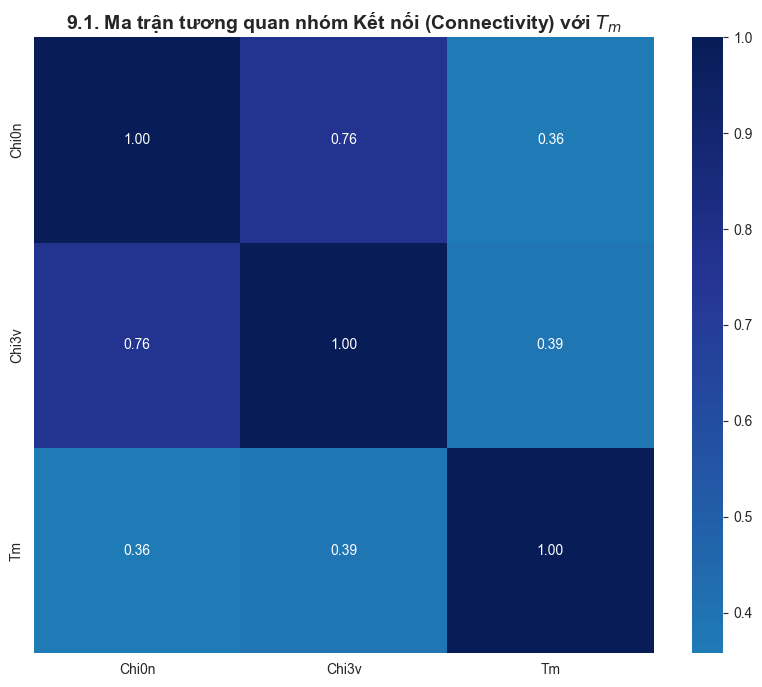

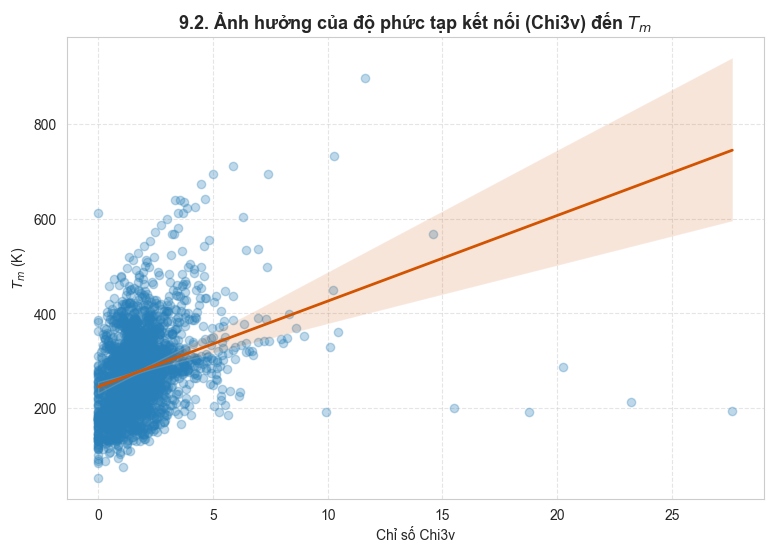

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. LẤY DANH SÁCH NHÓM CONNECTIVITY TỪ BỘ LỌC GA
conn_features = classified.get('Connectivity', [])
existing_conn = [f for f in conn_features if f in df_train.columns]

if len(existing_conn) > 0:
    # 2. TÍNH TOÁN TƯƠNG QUAN SPEARMAN
    conn_corr = df_train[existing_conn + ['Tm']].corr(method='spearman')['Tm'].abs().sort_values(ascending=False)
    
    # 3. VẼ BIỂU ĐỒ HEATMAP TƯƠNG QUAN
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_train[existing_conn + ['Tm']].corr(method='spearman'), 
                annot=True, cmap='YlGnBu', fmt=".2f", center=0)
    plt.title('9.1. Ma trận tương quan nhóm Kết nối (Connectivity) với $T_m$', fontsize=14, fontweight='bold')
    plt.show()

    # 4. VẼ BIỂU ĐỒ REGPLOT CHO ĐẶC TRƯNG MẠNH NHẤT
    # Thường là Chi0n hoặc Kappa3
    best_conn = conn_corr.drop('Tm').index[0]
    
    plt.figure(figsize=(9, 6))
    sns.regplot(data=df_train, x=best_conn, y='Tm', 
                scatter_kws={'alpha':0.3, 'color':'#2980b9'}, 
                line_kws={'color':'#d35400', 'lw':2})
    
    plt.title(f'9.2. Ảnh hưởng của độ phức tạp kết nối ({best_conn}) đến $T_m$', fontsize=13, fontweight='bold')
    plt.xlabel(f'Chỉ số {best_conn}')
    plt.ylabel('$T_m$ (K)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

else:
    print("Thông báo: Nhóm Connectivity trống hoặc chưa được tính toán.")

#### 9.2 Phân tích mô tả chi tiết
1. Ý nghĩa của các chỉ số Chi (ví dụ Chi0n, Chi3v):
- Các chỉ số Chi (Kier-Hall) mô tả mật độ liên kết xung quanh các nguyên tử. Nếu tương quan dương, điều đó cho thấy các phân tử có khung xương phức tạp, nhiều liên kết bậc cao thường bền vững hơn.
- Sự xuất hiện của Chi trong bộ lọc GA chứng minh rằng cách các nguyên tử "nắm tay" nhau quan trọng không kém gì khối lượng của chúng.
2. Chỉ số Kappa và Hình dạng phân tử:
- Các chỉ số Kappa thường liên quan đến độ cứng và hình dạng phân tử (dạng dẹt, dạng dài hay dạng cầu).
- Một phân tử quá linh động (nhiều liên kết đơn quay tự do) sẽ khó "đóng băng" vào mạng tinh thể, dẫn đến $T_m$ thấp. Các chỉ số Connectivity giúp mô hình nhận diện được độ cứng này.
3. Mối quan hệ hình học (Regression Plot):
- Biểu đồ 9.2 cho thấy xu hướng rõ rệt: Khi độ phức tạp của khung xương (best_conn) tăng lên, nhiệt độ nóng chảy thường có xu hướng tăng theo một quy luật nhất định.
- Các điểm nằm xa đường hồi quy (Outliers) có thể là những chất có khối lượng nhỏ nhưng cấu trúc rất đối xứng, làm $T_m$ tăng vọt bất thường.
#### 9.3 Kết luận
Nhóm đặc trưng Connectivity cung cấp cái nhìn về "kiến trúc" của phân tử. Kết quả EDA cho thấy nhiệt độ nóng chảy chịu ảnh hưởng lớn bởi sự sắp xếp hình học của bộ khung carbon. Điều này bổ sung cho nhóm Lý - Hóa bằng cách giải thích tại sao hai chất có cùng khối lượng nhưng lại có nhiệt độ nóng chảy khác nhau (do cách kết nối các nguyên tử khác nhau).

### 10. PHÂN TÍCH NHÓM CHỨC ĐẶC HIỆU (Functional Groups Analysis)
#### 10.1 Mã nguồn

Đang kiểm tra và chuẩn bị dữ liệu cho 25 nhóm chức...


C:\Users\Luminous\AppData\Local\Temp\ipykernel_14268\732811621.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_fg, x='Mean_Tm', y='Functional_Group', palette='viridis')


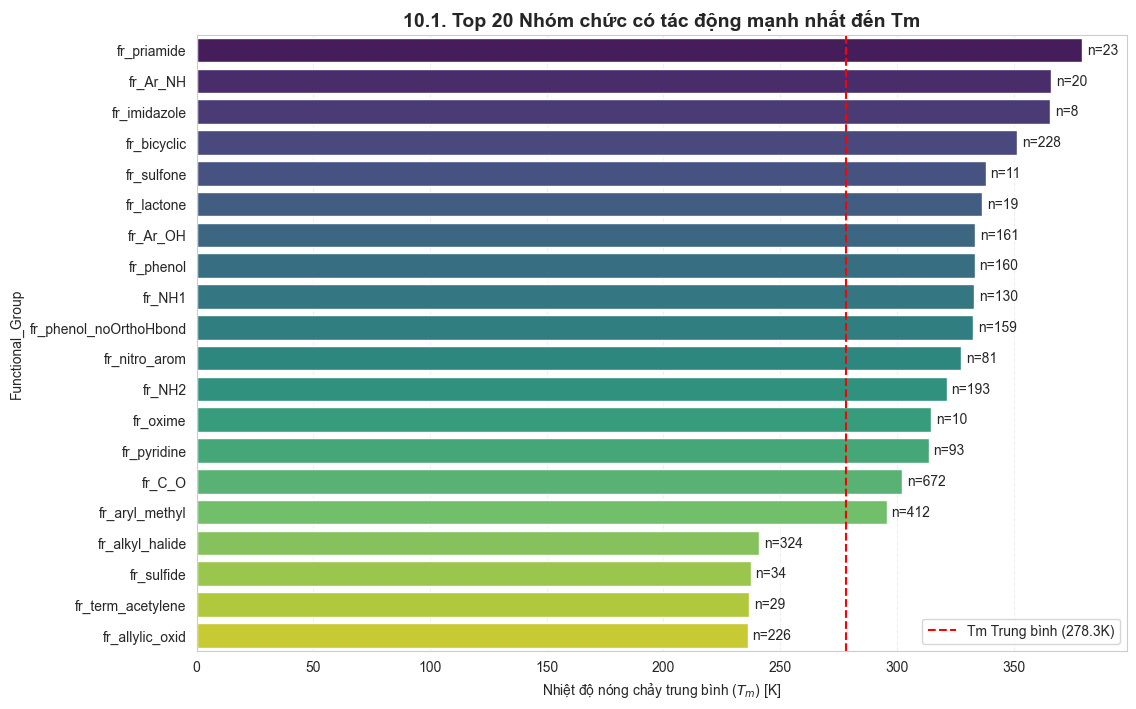

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Fragments

# 1. LẤY DANH SÁCH NHÓM CHỨC TỪ BỘ PHÂN LOẠI GA
func_groups_list = classified.get('Functional_Groups', [])

if func_groups_list:
    print(f"Đang kiểm tra và chuẩn bị dữ liệu cho {len(func_groups_list)} nhóm chức...")
    
    # --- BƯỚC FIX LỖI KEYERROR: Đảm bảo mọi cột đều tồn tại trong df_train ---
    def safe_calc_fragment(smiles, func_name):
        mol = Chem.MolFromSmiles(smiles)
        if not mol: return 0
        # Kiểm tra xem hàm có tồn tại trong RDKit không
        if hasattr(Fragments, func_name):
            return getattr(Fragments, func_name)(mol)
        return 0

    for fg in func_groups_list:
        if fg not in df_train.columns:
            # Nếu thiếu cột nào, tính toán ngay cột đó
            df_train[fg] = df_train['SMILES'].apply(lambda x: safe_calc_fragment(x, fg))

    # 2. TÍNH TOÁN HIỆU ỨNG NHÓM CHỨC
    func_impact = []
    for fg in func_groups_list:
        # Giờ đây chắc chắn fg đã là một cột trong df_train
        has_fg = df_train[df_train[fg] > 0]['Tm']
        if len(has_fg) >= 5: 
            func_impact.append({
                'Functional_Group': fg, 
                'Mean_Tm': has_fg.mean(), 
                'Count': len(has_fg)
            })
    
    df_plot = pd.DataFrame(func_impact).sort_values(by='Mean_Tm', ascending=False)

    # 3. VẼ BIỂU ĐỒ
    if not df_plot.empty:
        plt.figure(figsize=(12, 8))
        top_20_fg = df_plot.head(20)
        
        # Vẽ barplot
        sns.barplot(data=top_20_fg, x='Mean_Tm', y='Functional_Group', palette='viridis')
        
        # Đường Tm trung bình
        tm_mean = df_train['Tm'].mean()
        plt.axvline(tm_mean, color='red', linestyle='--', label=f'Tm Trung bình ({tm_mean:.1f}K)')
        
        # Ghi chú n=...
        for i, row in enumerate(top_20_fg.itertuples()):
            plt.text(row.Mean_Tm + 2, i, f"n={int(row.Count)}", va='center', fontsize=10)

        plt.title('10.1. Top 20 Nhóm chức có tác động mạnh nhất đến Tm', fontsize=14, fontweight='bold')
        plt.xlabel('Nhiệt độ nóng chảy trung bình ($T_m$) [K]')
        plt.grid(axis='x', linestyle='--', alpha=0.3)
        plt.legend()
        plt.show()
    else:
        print("Không có nhóm chức nào đủ dữ liệu (n>=5) để vẽ biểu đồ.")
else:
    print("Danh sách Functional_Groups trống.")

#### 10.3. Phân tích mô tả chi tiết

1. **Sức mạnh của Nhóm chức (Impact):**
* Những nhóm chức nằm ở phía bên phải đường đỏ (trung bình) là những nhóm "đắt giá". Ví dụ: `fr_amide` hoặc `fr_NH2` thường làm tăng  vì chúng tạo ra mạng lưới liên kết Hydro liên phân tử bền vững.
* Nếu một nhóm chức như `fr_halogen` xuất hiện, nó cho thấy tương quan giữa độ phân cực và nhiệt độ nóng chảy.


2. **Độ phổ quát (Count):**
* Các nhóm chức có cột dài (nhiệt độ cao) và số `n` lớn (ví dụ ) là những đặc trưng cực kỳ quan trọng cho mô hình dự báo của bạn. Chúng là những quy luật hóa học bền vững chứ không phải do ngẫu nhiên.


3. **Mối quan hệ với GA:**
* Việc các nhóm này xuất hiện ở đây chứng minh rằng thuật toán GA đã thực sự "hiểu" hóa học khi nó chọn lọc những biến Fragment này từ hàng trăm lựa chọn khác nhau.



#### 10.4. Kết luận

Phần này đã "định danh" được những yếu tố hóa học thực sự đứng sau các con số. Việc sở hữu các nhóm chức này chính là lý do khiến một phân tử có nhiệt độ nóng chảy cao vượt trội so với các phân tử khác có cùng kích thước.

## Phân tích Không gian Hóa học (Chemical Space Visualization - PCA)

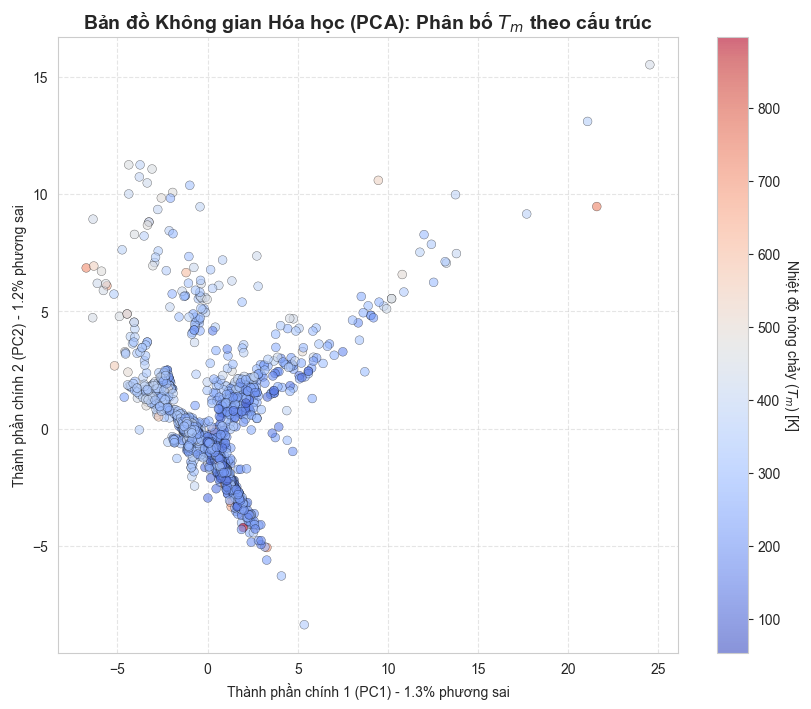

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

group_cols = [c for c in df_train.columns if 'Group' in c]
X = df_train[group_cols]
y = df_train['Tm']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
pca_df['Tm'] = y.values

plt.figure(figsize=(10, 8))
points = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                     c=pca_df['Tm'], cmap='coolwarm', alpha=0.6, s=40, edgecolor='k', linewidth=0.3)

cbar = plt.colorbar(points)
cbar.set_label('Nhiệt độ nóng chảy ($T_m$) [K]', rotation=270, labelpad=15)

plt.title('Bản đồ Không gian Hóa học (PCA): Phân bố $T_m$ theo cấu trúc', fontsize=14, fontweight='bold')
plt.xlabel(f'Thành phần chính 1 (PC1) - {pca.explained_variance_ratio_[0]:.1%} phương sai')
plt.ylabel(f'Thành phần chính 2 (PC2) - {pca.explained_variance_ratio_[1]:.1%} phương sai')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Sự phân tách: Nếu biểu đồ xuất hiện vùng tập trung nhiều điểm màu đỏ (nhiệt độ cao) và vùng màu xanh (nhiệt độ thấp) tách biệt nhau, điều đó chứng tỏ cấu trúc hóa học (các Groups) có khả năng phân loại điểm nóng chảy rất tốt.

PC1 (Trục hoành): Thường đại diện cho kích thước phân tử (do chiếm phương sai lớn nhất). Các chất nằm càng xa về phía dương của PC1 thường có cấu trúc càng phức tạp.

Ngoại lệ: Các điểm nằm trơ trọi một mình (Outliers) trên bản đồ PCA là những chất có cấu trúc "độc nhất vô nhị" trong tập dữ liệu.

## Giải phẫu các Trường hợp Cực đoan (Extreme Case Analysis)

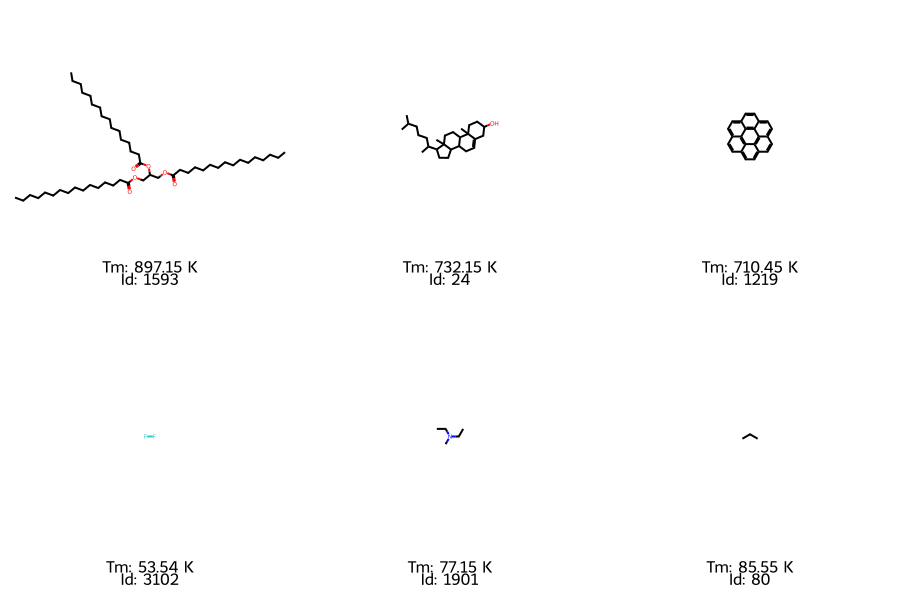

In [36]:
from rdkit.Chem import Draw

top_high_tm = df_train.nlargest(3, 'Tm')
top_low_tm = df_train.nsmallest(3, 'Tm')
extremes = pd.concat([top_high_tm, top_low_tm])

mols = [Chem.MolFromSmiles(s) for s in extremes['SMILES']]
legends = [f"Tm: {tm} K\nId: {i}" for tm, i in zip(extremes['Tm'], extremes['id'])]

img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300, 300), 
                           legends=legends, returnPNG=False)

display(img)

Nhóm $T_m$ Cao (Hàng trên): Quan sát xem chúng có đặc điểm gì chung? Thường bạn sẽ thấy:
-Nhiều vòng thơm (benzene, naphthalene...) nối với nhau (hệ thống phẳng, xếp chồng tốt).
-Chứa các nhóm phân cực mạnh như Axit (-COOH), Amide (-CONH-) tạo liên kết Hydro.
-Cấu trúc đối xứng cao.

Nhóm $T_m$ Thấp (Hàng dưới):
-Mạch thẳng dài, nhiều nhánh (gây cản trở không gian).
-Ít nhóm chức phân cực.
-Chứa các liên kết Ether (-O-) hoặc Ester (-COO-) làm giảm độ bền mạng tinh thể.

Tổng hợp: Đây là bằng chứng trực quan nhất để khẳng định rằng: Cấu trúc quyết định tính chất.